# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = mouse_metadata.merge(study_results)

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_ID = df[df.duplicated(['Mouse ID', 'Timepoint'])]

dup_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df['Mouse ID'] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'] != "g989"]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
clean_df['Tumor Volume (mm3)'].astype(int)
clean_group = clean_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
vol_avg = clean_group.mean('Tumor Volume (mm3)')
vol_med = clean_group.median('Tumor Volume (mm3)')
vol_var = clean_group.var('Tumor Volume (mm3)')
vol_dev = clean_group.std('Tumor Volume (mm3)')
vol_err = clean_group.sem('Tumor Volume (mm3)')

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": vol_avg,
                         "Median Tumor Volume": vol_med,
                         "Tumor Volume Variance": vol_var,
                         "Tumor Volume Std. Dev.": vol_dev,
                         "Tumor Volume Std. Err.": vol_err})

summary_df

TypeError: could not convert string to float: 'Tumor Volume (mm3)'

In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_group["Tumor Volume (mm3)"].agg([ "mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

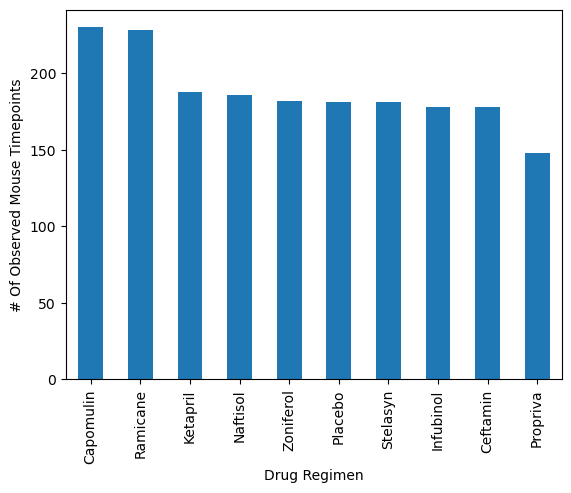

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df['Drug Regimen'].value_counts().plot.bar(ylabel='# Of Observed Mouse Timepoints');

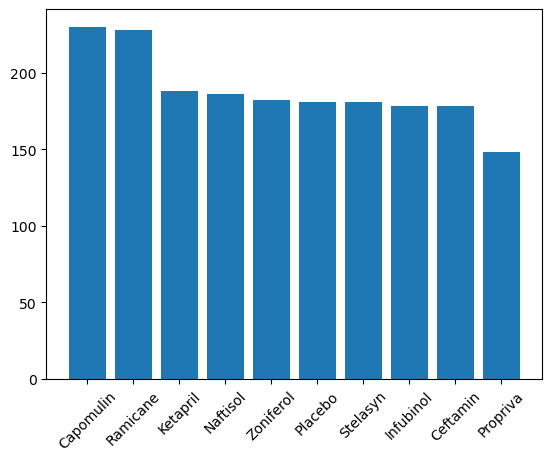

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df2  = clean_df['Drug Regimen'].value_counts(ascending=False)
plt.bar(df2.keys(),df2)
plt.xticks(rotation=45);

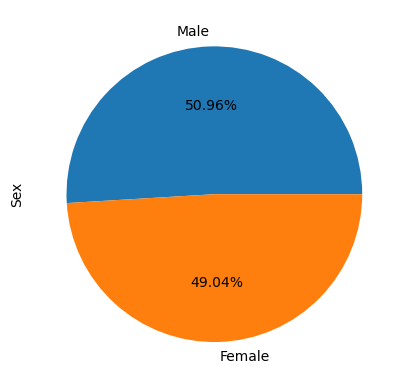

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.Sex.value_counts().plot.pie(autopct='%.2f%%',ylabel='Sex');

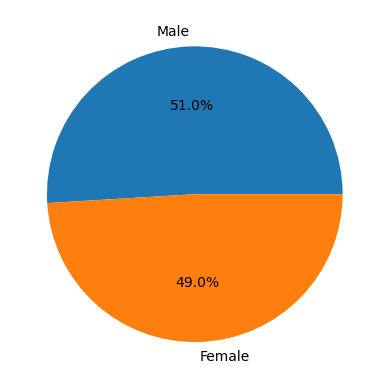

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df3 = clean_df.Sex.value_counts()
plt.pie(df3, autopct='%.1f%%', labels=['Male','Female']);


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_df = clean_df.groupby(['Mouse ID'], as_index=False).max('Timepoint')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatment_df = group_df.merge(clean_df)
treatment_df

,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex
0,a203,20,23,45,67.973419,2,Infubinol,Female
1,a251,21,25,45,65.525743,1,Infubinol,Female
2,a262,17,29,45,70.717621,4,Placebo,Female
3,a275,20,28,45,62.999356,3,Ceftamin,Female
4,a366,16,29,30,63.440686,1,Stelasyn,Female
...,...,...,...,...,...,...,...,...
194,z314,21,28,5,45.934712,0,Stelasyn,Female
195,z435,12,26,10,48.710661,0,Propriva,Female
196,z581,24,25,45,62.754451,3,Infubinol,Female
197,z795,13,29,45,65.741070,3,Naftisol,Female


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [Capomulin, Ceftamin, Infubinol, Ramicane]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = "".quartile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


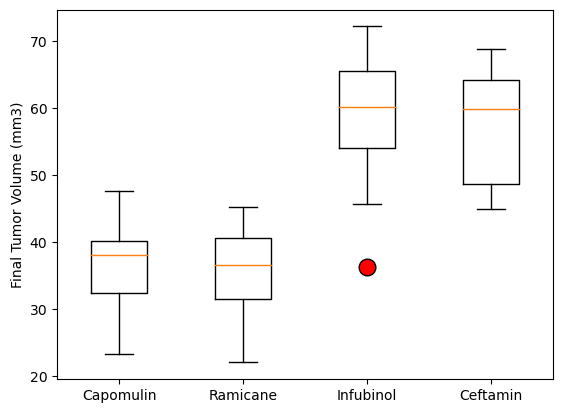

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = df.boxplot(by= )

## Line and Scatter Plots

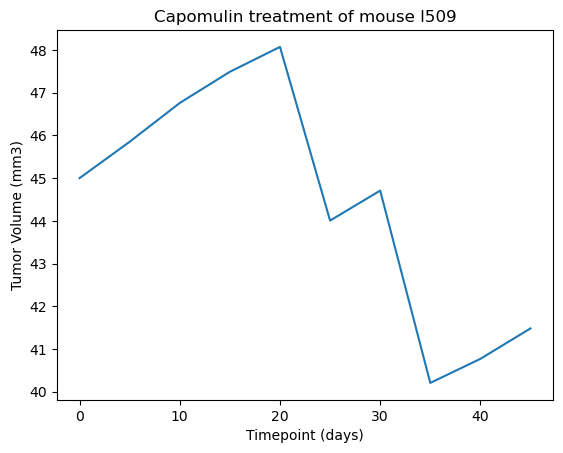

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


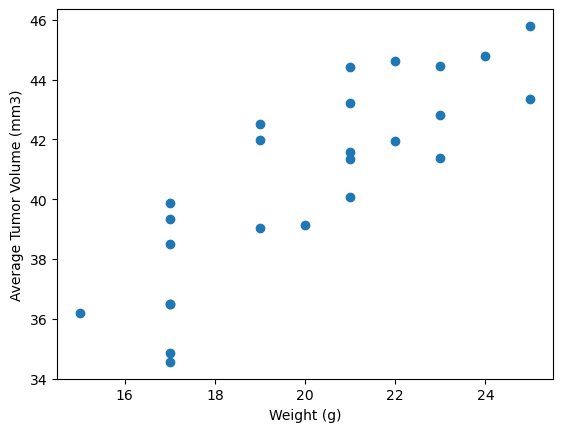

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


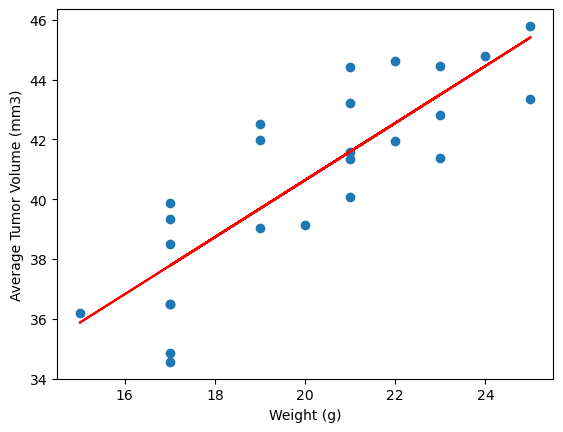

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
